# Particle physics data-analysis with CMS open data

This week we will use real data from the CMS experiment at CERN for a simple particle physics data analysis. The goal of the exercise is to discover the appearance of a particle by making a histogram from the _invariant mass_ values of muon pairs detected in the CMS detector. In the following weeks, we will determine the lifetime of a particle by fitting a Breit-Wigner distribution function to the histogram and study the effect of pseudorapidity on the mass distribution.

The structure of this week's exercise is the following:
- Theory background
- Calculation of invariant masses
- Making and analyzing the histogram

Now take a relaxed position and read the theory background first. Understanding the theory is essential for reaching the goal and learning from the exercise. So take your time and enjoy the fascinating world of particle physics!

## Theory background

Particle physics is the field of physics which studies the structure of matter and radiation, and the interactions between them. In experimental particle physics, research is made by accelerating particles and colliding them with either other particles or solid targets. This is done with _particle accelerators_. The collisions are examined with _particle detectors_.

The world's biggest particle accelerator, the Large Hadron Collider (LHC), is located at CERN, the European Organization for Nuclear Research. The 27 kilometers long LHC is a circle-shaped synchrotron accelerator, located in a tunnel 100 meters underground on the border of France and Switzerland (see Figure 1).

<figure>
    <img src="../images/LHC.png" alt="image missing" style="height: 350px" />
    <figcaption>Figure 1: The Large Hadron Collider and the four detectors around it. &copy; <a href="https://cds.cern.ch/record/1708847">CERN</a> [1]</figcaption>
</figure>

In 2012 the ATLAS and CMS collaborations at CERN made an announcement that they had observed a new particle which had a mass compatible with the expected mass of the Higgs boson. Higgs boson and the Higgs field related to it explain the origin of the mass of particles. In 2013 Peter Higgs and François Englert, who predicted the Higgs boson theoretically, were awarded the Nobel prize in physics.

### Accelerating particles

The LHC is used for accelerating protons and heavy ions (mainly Pb). The proton source of the LHC is a bottle of hydrogen where protons are produced by stripping the electrons away from the hydrogen atoms with the help of an electric field.

Before the protons arrive in the LHC, they are accelerated with electric fields and directed with magnetic fields in the Linac 2, the Proton Synchrotron Booster, the Proton Synchrotron, and the Super Proton Synchrotron accelerators. 

After pre-accelerating the protons, they are directed to the LHC. At this stage, the protons have gained an energy of 450 GeV. Protons will be directed into constantly spread bunches in two different proton beams. Each beam contains 2808 proton bunches located about 7,5 meters away from each other. Each of these bunches holds $1\text{,}2\cdot 10^{11}$ protons. The beams will circulate in opposite directions in two different vacuum tubes. Figure 2 shows part of the LHC accelerator opened with the two vacuum tubes inside. Each proton beam can reach the energy of about 7 TeV (7000 GeV) in the LHC.

<figure>
    <img src="../images/LHC2.jpg" alt="image missing" style="height: 350px" />
    <figcaption> Figure 2: Part of the LHC accelerator opened. &copy; <a href="https://cds.cern.ch/record/905940">CERN</a> [2]</figcaption>
</figure>

Particle collisions are created by crossing the two particle beams, which are heading in the opposite directions. When two proton bunches cross, not all of the protons collide with each other. Only about 40 protons per bunch crossing will collide and create about 20 collisions. Because the bunches are traveling so fast, there will be about 40 million bunch crossings per one second in the LHC which means that there will be 800 million proton collisions every second in the LHC. That's a lot of action!

The maximum energy in collisions is 14 TeV. However, in most cases, the collision energy is smaller than that because when protons collide, it is the quarks and gluons inside the protons, which collide with each other. So all of the energy of the protons won't be transmitted to the collision.

When the protons collide, the collision energy can be transformed into mass ($E=mc^2$). New particles may be produced in the collisions. By examining and measuring the particles created in the collisions, researchers are trying to further the understanding of the elementary building blocks of matter, including the elusive dark matter.

Figure 3 shows a visualization of a collision event in the CMS detector.

<figure>
    <img src="../images/eventdisplay.png" alt="image missing" style="height: 450px" />
    <figcaption> Figure 3: Collision event in CMS detector.</figcaption>
</figure>

### Video

The acceleration and collision processes are summarised well in the short video below. Watch the video from the start until 1:15 to get an idea of these processes. You can start the video by running the code cell below (click the cell and then press CTRL + ENTER).

In [1]:
from IPython.display import HTML

HTML('<iframe width="840" height="473" src="https://www.youtube.com/embed/pQhbhpU9Wrg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Users/kimmokal/IPP1_2022/venv/lib/python3.9/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Examining particle collisions

Particle collisions are examined with _particle detectors_. In LHC, the particle beams are crossed in four different points. There are four main particle detectors, each located in one of the crossing points: ATLAS, LHCb, ALICE and CMS (see Figure 1). This exercise focuses on the CMS detector.

CMS, the Compact Muon Solenoid, is a general-purpose detector. The two main goals of the CMS are the study of the Standard Model of particle physics and the search for physics beyond the Standard Model (such as dark matter and supersymmetry).

The actual purpose of the CMS detector itself is to detect particles that are created in collisions and measure different quantities from them. The CMS consists of different sub-detectors, which detect and measure the different particles. The structure of the CMS detector is shown in Figure 4.

<figure>
    <img src="../images/CMS.jpg" alt="image missing" style="height: 360px" />
    <figcaption> Figure 4: CMS detector opened. &copy; <a href="https://cds.cern.ch/record/1433717">CERN</a> [3]</figcaption>
</figure>

The sub-detectors in the CMS form an onion-like structure, which ensures that as many particles as possible from the collision are detected.

Different particles interact differently in the various sub-detectors. Figure 5 shows the cross-section of the CMS. Proton beams would travel in and out of the plane. Figure 5 also demonstrates how different particles, created in a collision, would traverse in the detector.

<figure>
    <img src="../images/CMS2.gif" alt="image missing" style="height: 350px" />
    <figcaption> Figure 5: The cross-section of the CMS detector. &copy; <a href="https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172">CERN</a> [4]</figcaption>
</figure>

The innermost part is the silicon tracker, which makes it possible to reconstruct trajectories of charged particles. Charged particles interact electromagnetically with the tracker creating an electric signal that can be measured. An intense magnetic field bends the trajectories of the charged particles. With the curvature of the trajectories shown by the signals created in the tracker, it is possible to calculate the momenta of the charged particles.

Particle energies can be measured with the help of the calorimeters. Electrons and photons will stop at the Electromagnetic Calorimeter (ECAL). Hadrons, such as protons and neutrons, will pass through the ECAL but will be stopped in the Hadron Calorimeter (HCAL).

ECAL is made from lead tungstate crystals that will produce light when electrons and photons pass through them. The amount of light produced is proportional to the energy of the particle. Therefore, it is possible to determine the energy of the particle stopped in ECAL with photodetectors. Also, the operation of the HCAL is based on detecting light.

Only muons and weakly interacting particles like neutrinos will pass both the ECAL and HCAL. Muons can be identified by the signals they leave in the muon chambers at the outermost layer of the detector. Their energy and momentum can be reconstructed by combining information from the muon chambers and the tracker, since muons leave signals in both. This allows the CMS detector to detect and measure muons at an unprecedented accuracy. This is why muons are also explicitly mentioned in the name of the experiment.

Neutrinos can't be detected directly with the CMS, but their existence can be derived with the help of missing energy. The total energy of the particles detected in a collision may be smaller than the energy before the collision. This conflicts with the energy conservation law. This indicates that something has been left undetected in the collision and, therefore, there is a possibility that neutrons were created in the collision.

### Recording the data

As mentioned above, there happens about billion particle collision in the CMS every second. The detector can detect all of these but it would be impossible to record all data from these collisions. Instead right after a collision different trigger systems will decide whether the collision has been potentially interesting or not. Non-interesting collisions won't be recorded. This multi-staged triggering process reduces the number of recorded collisions from billion to about thousand collisions per second.

Data collected from collisions will be saved to AOD (Analysis Object Data) files that can be opened with the ROOT program (https://root.cern.ch/). Structures of the files are very complicated so those can't be handled for example in simple data tables.

In this exercise, a CSV file format is used instead. A CSV file is just a regular text file that contains different values separated with commas (see Figure 6). These files can be easily read and handled with Python.

<figure>
    <img src="../images/datafile.png" alt="image missing" style="height: 80px" />
    <figcaption> Figure 6: An example of the structure of the CSV file.</figcaption>
</figure>

### Indirect detection of particles

Not every particle can be detected directly as explained above with the CMS or other particle detectors. Many interesting processes are often short-lived, so the particles themselves might not even get out of the vacuum pipe where the collision happened before decaying into other particles. These processes can be studied through the long-lived decay products that reach the detector, but this means that the detection of short-lived particles is indirect.

For example, Z boson (the particle that mediates weak interaction) can't be detected directly with the CMS since the lifetime of Z is very short. This means that the Z boson will decay before it even reaches the silicon detector.

How it is possible to detect the Z boson then? A solution to this question comes from the decay process of the Z boson. If particles that originate from the decay of the Z are possible to detect, it is also possible to deduce the existence of Z.

Z boson can decay in 24 different ways. In this exercise, only one of these is considered: the decay of Z to muon $\mu^-$ and antimuon $\mu^+$. The Feynman diagram of this decay process is shown in Figure 7.

<figure>
    <img src="../images/Zdecay.png" alt="image missing" style="height: 170px" />
    <figcaption> Figure 7: Z boson decaying into muon and antimuon.</figcaption>
</figure>

Muons that are created in the decay process can be detected with the CMS. But just the detection of the muon and the antimuon isn't sufficient evidence of the existence of the Z. The detected two muons could originate from any of the processes that will happen in the collision event (many different processes are going on at the same time). Because of this, the mass of Z also needs to be reconstructed.

### The invariant mass

The mass of the Z boson (or some other particle) can be determined with the help of a concept called _invariant mass_. Let's next derive loosely an expression for the invariant mass.

Consider a situation where a particle with mass $M$ and energy $E$ decays into two particles with masses $m_1$ and $m_2$, and energies $E_1$ and $E_2$. Energy $E$ and momentum $\mathbf{p}$ is conserved in the decay process so $E = E_1 +E_2$ and $\mathbf{p} = \mathbf{p}_1+ \mathbf{p}_2$.

Particles will obey the relativistic dispersion relation:

$$
Mc^2 = \sqrt{E^2 - c^2\mathbf{p}^2}.
$$

Together with the conservation of energy and momentum, this can be shown as

$$
Mc^2 = \sqrt{(E_1+E_2)^2 - c^2(\mathbf{p_1} + \mathbf{p_2})^2}
$$
$$
=\sqrt{E_1^2+2E_1E_2+E_2^2 -c^2\mathbf{p_1}^2-2c^2\mathbf{p_1}\cdot\mathbf{p_2}-c^2\mathbf{p_2}^2}
$$
$$
=\sqrt{2E_1E_2 - 2c^2 |\mathbf{p_1}||\mathbf{p_2}|\cos(\theta)+m_1^2c^4+m_2^2c^4}. \qquad (1)
$$

The relativistic dispersion relation can be brought to the following format:

$$
M^2c^4 = E^2 - c^2\mathbf{p}^2
$$
$$
E = \sqrt{c^2\mathbf{p}^2 + M^2c^4},
$$

from where by setting $c = 1$ (very common in particle physics) and by assuming that the masses of the particles are very small compared to their momenta, we end up with the following expression:

$$
E = \sqrt{\mathbf{p}^2 + M^2} = |\mathbf{p}|\sqrt{1+\frac{M^2}{\mathbf{p}^2}}
\stackrel{M<<|\mathbf{p}|}{\longrightarrow}|\mathbf{p}|.
$$

By applying $E = |\mathbf{p}|$ to equation (1), it can be reduced to the format

$$
M=\sqrt{2E_1E_2(1-\cos(\theta))},
$$

where $\theta$ is the angle between the momentum vector of the particles. With this equation, it is possible to calculate the invariant mass for the particle pair if energies of the particles and the angle $\theta$ are known.

In experimental particle physics, the equation for the invariant mass is often in the form

$$
M = \sqrt{2p_{T1}p_{T2}( \cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2) )}, \qquad (2)
$$

where transverse momentum $p_T$ is the component of the momentum of the particle that is perpendicular to the particle beam, $\eta$ is the pseudorapidity and $\phi$ is the azimuth angle. Pseudorapidity and the angle $\theta$ are related by $\eta = -\ln(\tan(\frac{\theta}{2}))$.

Figure 8 expresses the angles $\theta$, $\eta$ and $\phi$ in the CMS detector. The particle beams will travel to the z-direction. Figure 8 also shows that because of the determination of $\eta$ it goes to 0 when $\theta = 90^{\circ}$ and to $\infty$ when $\theta = 0^{\circ}$.

<figure>
    <img src="../images/CMSangles.png" alt="image missing" style="height: 300px" />
    <figcaption> Figure 8: Angles $\theta$, $\eta$ and $\phi$ in the CMS detector.</figcaption>
</figure>

### Reconstructing particle mass

With invariant mass, it is possible to prove the existence of a particle. In this exercise, you will use data that contains such collisions where two muons have been detected (among with many other particles). It is possible to calculate an invariant mass value for a muon pair in one collision event using equation (2).

If the invariant mass of the muon pair is equal to the mass of, for example, Z boson, it is possible that the muon pair originates from the decay of the Z. If the invariant mass of the muon pair gets some other value the muons have likely originated from some other processes. This leads to the observed reconstructed invariant masses forming a peak around the Z-boson mass that would not exist unless there was a particle with that particular mass decaying into muons. __Therefore, invariant mass can be used as evidence of the existence of the Z boson__.

### Identifying the particle

In practice, the identification of a particle goes in the following way. The invariant mass for two muons is calculated for a large number of collision events. Then, a histogram is made from the calculated invariant mass values.

If a peak (many invariant mass values near the same bin) is formed in the histogram, it can prove that in the collision events there has been a particle which mass corresponds to the peak. After that, it is possible to fit a function to the histogram and determine the mass and the lifetime of the particle from the parameters of the fitted function (this will be done in exercise 3).

The reason why invariant mass distribution forms a peak near a particle is based on the uncertainty principle $\Delta E \Delta t \gtrsim \hbar $, which states that we cannot know exactly both the energy and lifetime of a particle. Therefore, the shorter the lifetime, the greater the uncertainty in energy.

[1] P. Mouche, *Overall view of the LHC. Vue d'ensemble du LHC*, 2014.
Url: [https://cds.cern.ch/record/1708847](https://cds.cern.ch/record/1708847).

[2] M. Brice, *View of an open LHC interconnection. Vue d'une interconnection ouverte*, 2005.
Url: [https://cds.cern.ch/record/905940](https://cds.cern.ch/record/905940)

[3] CMS Collaboration, *Detector Drawings*, 2012.
Url: [https://cds.cern.ch/record/1433717](https://cds.cern.ch/record/1433717).

[4] M. Lapka, D. Barney, E. Quigg et al., *Interactive slice of CMS detector*, 2010.
Url: [https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172](https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/ShowDocument?docid=4172).

# Exercises

Your task is to read collision data from a csv-file, calculate the invariant mass of the two muons for each collision event in the dataset, plot a histogram from the invariant mass values and identify the particle that was decayed into two muons. Here is a summary what you should do.

1. Read **dataset1.csv**.
1. **Write** your **solutions** to the exercises **in notebook**.
1. **Submit** your notebook to the Experimental analysis submission activity in Moodle.

## Part 1 - data

Use the datafile dataset1.csv.

The data file contains data from collision events, where two muons were observed. Note that the file is stored in the same folder as this notebook file so that you can easily read it using _pandas_ -library. If you are coding using some other IDE, you need to copy your data file from Github.

Read the data from file and save it to a Pandas dataframe called 'ds'. You can print the first few rows using head()-method to see how the data looks like.

<br>

$\color{red}{\text{Write the code below}}$

In [14]:
import pandas as pd

ds = pd.read_csv("dataset2.csv")
print(ds.head())

      Run     Event Type1        E1       px1      py1       pz1      pt1  \
0  165617  74969122     G   59.9226 -46.15160  29.4115  -24.4070  54.7266   
1  165617  75138253     G   97.1011 -23.61440   6.6660  -93.9497  24.5372   
2  165617  75887636     G  152.9720   7.46565 -30.7098 -149.6710  31.6042   
3  165617  75833588     G  181.8770  44.14270 -14.9498  175.8040  46.6055   
4  165617  75779415     G   50.2440  37.80720 -12.2044  -30.7590  39.7283   

       eta1      phi1  Q1 Type2        E2       px2       py2        pz2  \
0 -0.432382  2.574210   1     G   52.4465  30.10970 -16.39890  -39.68760   
1 -2.052350  2.866470  -1     G   30.5992 -11.61340 -25.98480   11.23470   
2 -2.259260 -1.332320  -1     G   33.5835  -9.28778  28.74570  -14.67190   
3  2.037920 -0.326545   1     G  170.0210 -34.63010  12.32480  166.00000   
4 -0.712422 -0.312246   1     G   49.2396 -47.60640   8.23376   -9.50613   

       pt2      eta2      phi2  Q2  
0  34.2859 -0.988511 -0.498717  -1  
1  28.

## Part 2 - calculation

As you probably saw from part 1, the dataset contains a number of different columns. The meaning of each column is:

- Run = The run number of the event.
- Event = The event number.
- Type = Either T or G, where T stands for tracker muon and G stands for global muon.
- E = The total energy of the muon (GeV).
- px, py, pz = The components of the momemtum of the muon (GeV).
- pt = The transverse momentum of the muon (GeV).
- eta = $\eta$ = The pseudorapidity of the muon.
- phi = $\phi$ = The phi angle of the muon (rad).
- Q = The charge of the muon.

Write a python function <b>invariant_mass( pt1, pt2, eta1, eta2, phi1, phi2 )</b> that takes transverse momentums, pseudorapidities and azimuth angles of two particles as parameters and <b>returns the invariant mass</b>. Remember that the invariant mass can be calculated as $M=\sqrt{2p_{T1}p_{T2}(\cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2))}$. 

<br>

$\color{red}{\text{Write the code below}}$

In [15]:
import numpy as np

def invariant_mass(pt1,pt2,eta1,eta2,phi1,phi2):
    return np.sqrt(2*pt1*pt2*(np.cosh(eta1-eta2)-np.cos(phi1-phi2)))

Use your invariant_mass -function to calculate the invariant mass of each pair of muons in the dataset. Save the masses to a variable called 'inv_mass'.
Hint: Remember that you can access to a column of a dataframe by writing "dataframe_name.column_name". You should be able to pass whole columns as parameters to your function (as long as the columns are of the same length).

<br>

$\color{red}{\text{Write the code below}}$

In [16]:
inv_mass = invariant_mass(ds.pt1,ds.pt2,ds.eta1,ds.eta2,ds.phi1,ds.phi2)

## Part 3 - histogram

Now that you have calculated the invariant masses for the entire dataset, it's time to plot a histogram and see what kind of distribution we get.

Plot a histogram from the invariant mass values. Use different amount of bins (at least 50 and 250) to see how the figure changes. You can also use "range"-attribute for plt.hist to zoom to a specific range. You should be able to see a peak. What particle does the peak correspond to (compared to Figure 9)?

$\color{red}{\text{Write the code below}}$


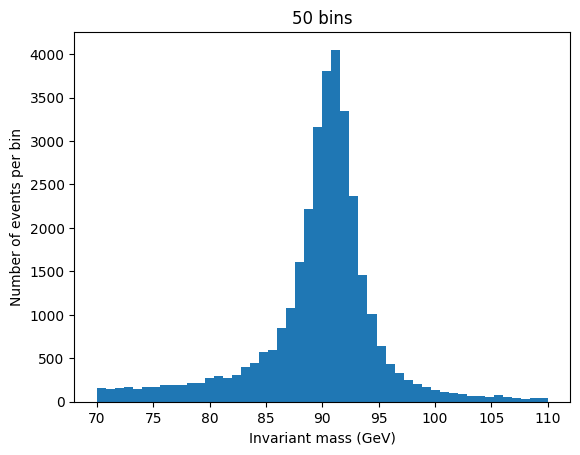

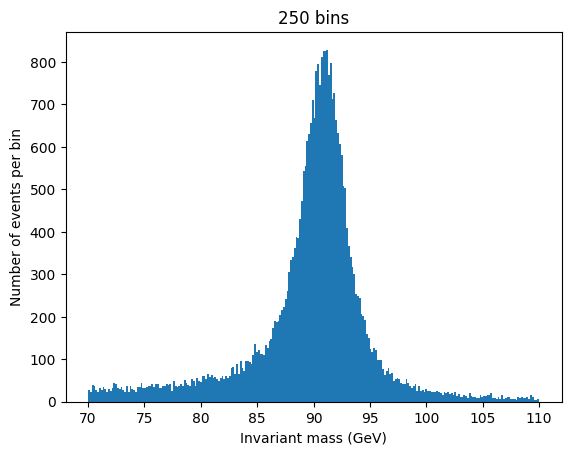

In [17]:
import matplotlib.pyplot as plt

plt.figure()
n1,bins,patches = plt.hist(inv_mass,50)
plt.title("50 bins")
plt.xlabel("Invariant mass (GeV)")
plt.ylabel("Number of events per bin")
plt.figure()
n2,bins,patches = plt.hist(inv_mass,250)
plt.title("250 bins")
plt.xlabel("Invariant mass (GeV)")
plt.ylabel("Number of events per bin")
plt.show()

# The peak corresponds to the J/psi meson at ~3 GeV

<figure>
    <img src="../images/CMShistogram.png" alt="image missing" style="height: 300px" />
    <figcaption> Figure 9: Histogram of collisions where two muons were observed.</figcaption>
</figure>